***
<h1 id="heading"><center><span style="background-color:#5642C5; color:white ; display:fill;border-radius:5px; font-family:cursive"> Visualization & Analysis 📊🔬</span></center><a class="anchor-link" href="">¶</a></h1>
<p><center style="color:#159364; font-family:cursive;">The best way to make yourself extremely valuable in a team is to understand everything, but being a master of something.</center></p>

***

<h3 id="heading"><span style="background-color:#cefffb; color:#1b4946; display:fill;border-radius:5px; font-family:cursive"> 👨‍💻 Description of the Problem</span></h3>

__Dataset Description__

Open Sourcing Mental Illness is a non-profit, corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities. OSMI began in 2013, with Ed Finkler speaking at tech conferences about his personal experiences as a web developer and open source advocate with a mental health disorder. The response was overwhelming, and thus OSMI was born.

*     Every year, OSMI came out with a new survey to see how employees want to get mental health treatment in tech companies around the world and I pick the survey from 2014.
*     This survey is filled by respondents who suffer from mental health disorders (diagnose or un-diagnosed by medical, even it's just a feeling) in tech companies and see if any factors can affect the employee to get treatment or not.
*    From this research, this machine learning can help HR to see what factors have the company needs to support so the employee wants to get mental health treatment.

__Acknowledgements__

The dataset is from Kaggle and can be downloaded [here](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey).

__Objective__

Some questions worth exploring: 

    - Can you predict whether a patient should be treated of his/her mental illness or not according to the values obtained in the dataset?
    - How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?
    - What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?


<h1 id="heading"><span style="background-color:#cefffb; color:#1b4946 ; display:fill;border-radius:5px; font-family:cursive"> 📥 Import packages & data </span></h1>

In [1]:
!pip install termcolor

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)from termcolor import colored # Print Bold Text in Python Using the termcolor
import plotly.express as px
import plotly.graph_objects as go #for do some pie chart
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-in-tech-survey/survey.csv


In [3]:
from termcolor import colored # Print Bold Text in Python Using the termcolor
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

<h1 id="heading"><span style="background-color:#cefffb; color:#1b4946 ; display:fill;border-radius:5px; font-family:cursive"> 🔬 Explore Overall data </span></h1>

<h2 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🔭 Viewing the data </span></h2>

In [4]:
data_ref = '../input/mental-health-in-tech-survey/survey.csv'
data = pd.read_csv(data_ref)
shape= data.shape
print ('This dataset contain' ,shape[0], 'individuels and', shape[-1] ,'questions.' )
print (colored('Exemples of the data:', 'red', attrs=['bold']))
data.head()

This dataset contain 1259 individuels and 27 questions.
Exemples of the data:


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


<h1 id="heading"><span style="background-color:#cefffb; color:#1b4946 ; display:fill;border-radius:5px; font-family:cursive"> 🧹🔎 Clean and Analyse</span></h1>

<h2 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🔄 Changing the indexing names </span></h2>

In [5]:
index = pd.Series(range(1,len(data.index)+1))
data= data.set_index( pd.Index(index))
data.index.name='Person'
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Person,,,,,,,,,,,,,,,,,,,,,
1255,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1256,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1257,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1258,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1259,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [6]:
list(data.columns)

['Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

see how the gender column values

<h2 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🧠 Understand each of the columns </span></h2>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1 to 1259
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

We can see that the columns "state", "self_employes", and "comments" are containe missing values.

So we need to fil them by value

<h3 id="heading"><span style="background-color:#CFFFB0; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">💡 Timestamp  </span></h3>

In [8]:
print(data["Timestamp"].sort_values())

Person
1       2014-08-27 11:29:31
2       2014-08-27 11:29:37
3       2014-08-27 11:29:44
4       2014-08-27 11:29:46
5       2014-08-27 11:30:22
               ...         
1255    2015-09-12 11:17:21
1256    2015-09-26 01:07:35
1257    2015-11-07 12:36:58
1258    2015-11-30 21:25:06
1259    2016-02-01 23:04:31
Name: Timestamp, Length: 1259, dtype: object


We can see that **Timestamp** is contain the time at which each person takes the survey.

The time taken by data is between  *2014-08-27* and *2016-02-02*.

but we see that the time that each person takes the survey doesn't help us in the analysis since it's not a factor that interacts with the effect of the mental health.  

So we can drop it.🤷‍♂️

In [9]:
data.drop(columns=['Timestamp'], inplace=True)

In [10]:
data.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Person,,,,,,,,,,,,,,,,,,,,,
1,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
3,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
4,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
5,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


<h3 id="heading"><span style="background-color:#CFFFB0; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">💡 Age  </span></h3>

Let see how are the values in the column **Age**

In [11]:
print("The dataset contains different age groups including: \n")
print(data["Age"].unique())

The dataset contains different age groups including: 

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


From the table we can see that the Age contain non logical value such: 
* **Negative Age**: -29, -1726,...
* **Big Value**: 99999999999 

So we need to clean them!!

We can not use the responses of those persons who give wrong responses in the analysis. So, we drop the entire rows of them.

In [12]:
data.drop(data[data['Age'] < 0].index, inplace = True) 
data.drop(data[data['Age'] > 100].index, inplace = True)

In [13]:
print("The ages groups that we will use include: \n")
print(data["Age"].unique())

The ages groups that we will use include: 

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72]


**Let see how is the distribution of the Ages**

29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
40    33
39    33
43    28
22    21
41    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
50     6
48     6
20     6
51     5
56     4
49     4
54     3
55     3
57     3
47     2
60     2
62     1
58     1
65     1
5      1
53     1
61     1
8      1
11     1
72     1
Name: Age, dtype: int64

 



<AxesSubplot:xlabel='Age', ylabel='count'>

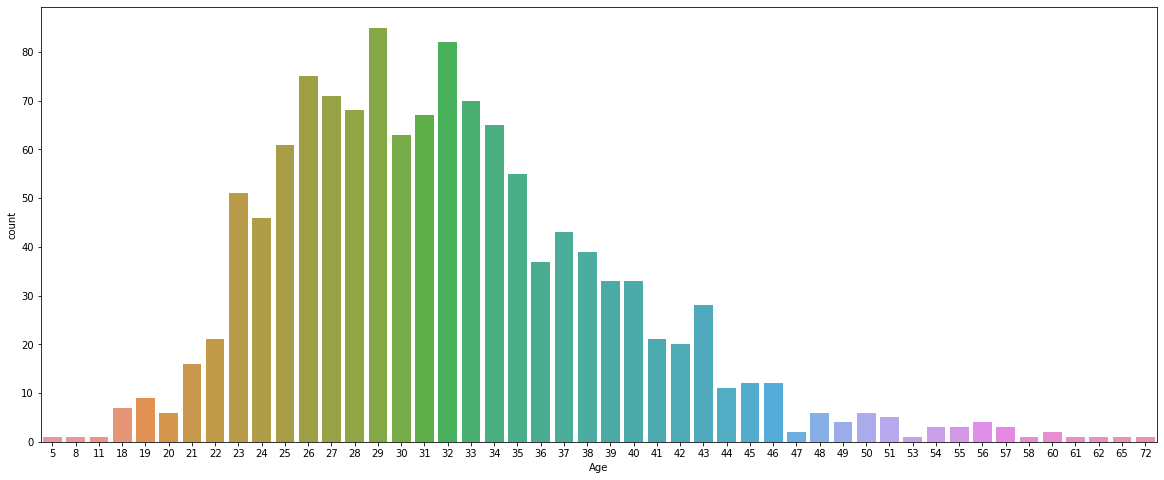

In [14]:
print(data["Age"].value_counts())
print('\n \n')
#plot as barchart
plt.figure(figsize=(20,8))
sns.countplot(x="Age", data=data)

From the above figure we can see that the majority of the people who conducted the survey are of middle age.

<h3 id="heading"><span style="background-color:#CFFFB0; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">💡 Gender </span></h3>

In [15]:
print("The dataset contains different gender groups including: \n")
print(data["Gender"].unique())

The dataset contains different gender groups including: 

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


We can see that **Gender** is contain diffeent values because people discripe themselve 

In terms of gender, we see that people have described themselves as male and female in different ways!

On a lighter note, this is what happens when you don't take survey questions like these in the form of checkboxes! 😁😁

We need to correct these responses. We'll rename and merge all classes that mean the same thing into one.

* Male, or cis Male, means who is born as a male and decides to be a Male.
* Female, or female, means she is born as a female and decides to be a Female.
* Other, is a word that describes non-straightened and gender-compliant sexual and gender identities. Lesbian, gay, bisexual, and transgender people may all identify with another word.

In [16]:
# Correction of the male gender
data['Gender'] = data['Gender'].replace(['Male', 'male', 'm', 'M', 'Man', 'maile', 'msle','Mail','Make',
                                         'Mal','Malr','Cis Male','Cis Man','Male ',
                                         'cis male','Male (CIS)'],'Male')
# Correction of the female gender
data['Gender'] = data['Gender'].replace(['Female', 'female', 'f', 'F', 'Woman', 'Femake', 'femail',
                                         'woman','Female ','Cis Female ','Female (cis)','cis-female/femme'
                                         ,'Cis Female',],'Female')
# Categorise the transgender to one category 
data['Gender'] = data['Gender'].replace(['Female (trans)', 'Trans woman', 'Trans-female', 'queer',
                                         'Guy (-ish) ^_^','queer/she/they','Genderqueer',
                                         'male leaning androgynous'],'Transgender')
# Categorise not specified gender 
data['Gender'] = data['Gender'].replace(['A little about you', 'Agender', 'something kinda male?',
                                         'All', 'Androgyne', 'Enby','Male-ish','Nah','Neuter','fluid',
                                         'non-binary','ostensibly male, unsure what that really means','p'],'not_specified')

In [17]:
print(data["Gender"].unique())

['Female' 'Male' 'not_specified' 'Transgender']


In [18]:
data['Gender'].value_counts()

Male             987
Female           247
not_specified     11
Transgender        9
Name: Gender, dtype: int64

In [19]:
## Creating a pie chart# 
### 1st: create labels using all unique values in the column named "
genders = pd.DataFrame(data['Gender'].value_counts().reset_index().values, columns=["Gender", "Count"])
genders_index = genders.sort_index(axis = 0, ascending=True)
## other definition 
# Construir a data frame containe number of person in each gender
#data_gender= pd.DataFrame({'count' : data.groupby( [ "Gender"] ).size()}).reset_index()
#data_gender
genders

,Gender,Count
0,Male,987
1,Female,247
2,not_specified,11
3,Transgender,9


In [20]:

gender_label=list(data['Gender'].unique())
fig = px.pie(genders, values="Count", names="Gender", color="Gender",
             color_discrete_map={'Female':"rgb(35, 36, 21)",
                                 'Male':"rgb(188,143,143)",
                                 'Transgender':"rgb(139,69,19)",
                                 'not_specified':"rgb(210,180,140)"})
#  some deferent colors  "rgb(210,180,140)", "rgb(218,165,32)", "rgb(139,69,19)", "rgb(175, 51, 21)","rgb(35, 36, 21)", "rgb(188,143,143)"
fig.update_layout(title_text="distribution of the Polulation from the gender")
fig.show()


we will use ploty figure object pie chart function for make the partition away from the center

In [21]:
gender_label=list(data['Gender'].unique())
# Note that the same number of colors are specified as there are unique populations. It is not mandatory, but
# will avoid a single color to be used multiple times.
# some deferent colors  "rgb(210,180,140)", "rgb(218,165,32)", "rgb(139,69,19)", "rgb(175, 51, 21)","rgb(35, 36, 21)", "rgb(188,143,143)"
color_marker=["rgb(35, 36, 21)", "rgb(188,143,143)", "rgb(139,69,19)", "rgb(210,180,140)"]
# defining the actual figure using the dimension: Gender
# Note that a pull keyword was specified to explode pie pieces out of the center
fig = go.Figure(    
    data=[
        go.Pie(
            labels=genders['Gender'],
            values=genders['Count'],
            # pull is given as a fraction of the pie radius
            pull=[0.1,  0.1, 0.2, 0.2],
            # iterate through color_marker list to color individual pie pieces
            marker_colors=color_marker,
        )
    ]
               )
# Update layout to show a title
fig.update_layout(title_text="distribution of the Polulation from the gender")
# display the figure
fig.show()


<h3 id="heading"><span style="background-color:#CFFFB0; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">💡 Country  </span></h3>

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 1 to 1259
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   object
 2   Country                    1254 non-null   object
 3   state                      741 non-null    object
 4   self_employed              1236 non-null   object
 5   family_history             1254 non-null   object
 6   treatment                  1254 non-null   object
 7   work_interfere             991 non-null    object
 8   no_employees               1254 non-null   object
 9   remote_work                1254 non-null   object
 10  tech_company               1254 non-null   object
 11  benefits                   1254 non-null   object
 12  care_options               1254 non-null   object
 13  wellness_program           1254 non-null   object
 14  seek_hel

In [23]:
data.Country.value_counts()

United States             748
United Kingdom            184
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Mexico                      3
Russia                      3
Finland                     3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Czech Repu

<AxesSubplot:xlabel='count', ylabel='Country'>

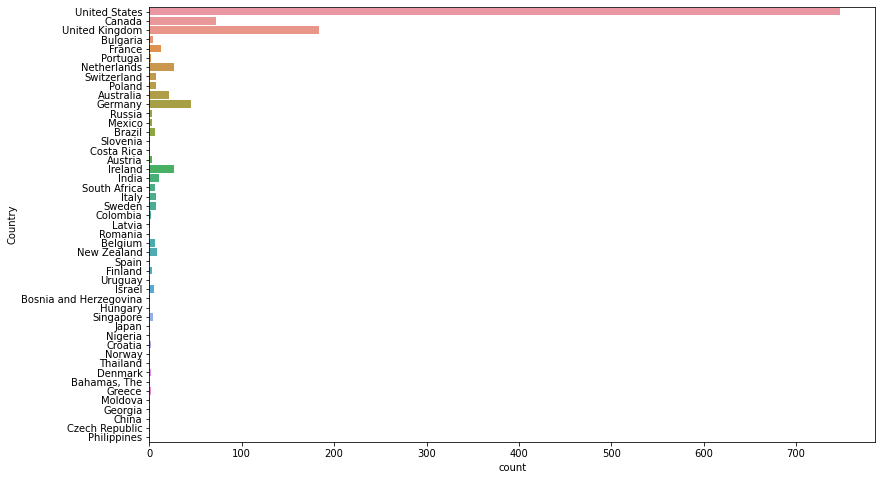

In [24]:
plt.figure(figsize=(13,8))
sns.countplot(y="Country", data=data)

### we can see that most of people who take the survey is located in unated state and unated kingdome.

### so its it didnt mean anything if we take the contry as afactor of absance or wjod mentl helth problem.

In [25]:
data.drop(columns=['Country'], inplace=True)

<h3 id="heading"><span style="background-color:#CFFFB0; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">💡 State  </span></h3>

As we did see that contry is related to unated state. as fact the state also will be related to just US.
We can drop it as well,

In [26]:
data.drop(columns=['state'], inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 1 to 1259
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   object
 2   self_employed              1236 non-null   object
 3   family_history             1254 non-null   object
 4   treatment                  1254 non-null   object
 5   work_interfere             991 non-null    object
 6   no_employees               1254 non-null   object
 7   remote_work                1254 non-null   object
 8   tech_company               1254 non-null   object
 9   benefits                   1254 non-null   object
 10  care_options               1254 non-null   object
 11  wellness_program           1254 non-null   object
 12  seek_help                  1254 non-null   object
 13  anonymity                  1254 non-null   object
 14  leave   

<h3 id="heading"><span style="background-color:#CFFFB0; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">💡 Comment  </span></h3>

In [28]:
data.comments.describe()

count                                 163
unique                                159
top       * Small family business - YMMV.
freq                                    5
Name: comments, dtype: object

may its be helpful if we use an RNN to understand meaning of the comment 

In [29]:
#drop the comments column
data.drop(columns=['comments'], inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 1 to 1259
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   object
 2   self_employed              1236 non-null   object
 3   family_history             1254 non-null   object
 4   treatment                  1254 non-null   object
 5   work_interfere             991 non-null    object
 6   no_employees               1254 non-null   object
 7   remote_work                1254 non-null   object
 8   tech_company               1254 non-null   object
 9   benefits                   1254 non-null   object
 10  care_options               1254 non-null   object
 11  wellness_program           1254 non-null   object
 12  seek_help                  1254 non-null   object
 13  anonymity                  1254 non-null   object
 14  leave   

We can see that **self_emopoyed and work_interfer** have a missing value.

But we cannot concern tghe fact that this two factor is important in the analysis.

Let check how it related

<h3 id="heading"><span style="background-color:#CFFFB0; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">💡 self_employed  </span></h3>

In [31]:
data.self_employed.unique()

array([nan, 'Yes', 'No'], dtype=object)

We can see that 
fil the nan value with no

In [32]:
data['self_employed'] = data['self_employed'].fillna('No')

In [33]:
data.self_employed.isna().count()

1254

In [34]:
data.self_employed.value_counts()

No     1110
Yes     144
Name: self_employed, dtype: int64

In [35]:
color_marker=["rgb(35, 36, 21)", "rgb(188,143,143)", "rgb(139,69,19)"]
fig = go.Figure(    
    data=[
        go.Pie(
            labels=data['self_employed'].unique(),
            values=data['self_employed'].value_counts(),
            # pull is given as a fraction of the pie radius
            pull=[0.1,  0.1, 0.2],
            # iterate through color_marker list to color individual pie pieces
            marker_colors=color_marker,
        )
    ]
               )
# Update layout to show a title
fig.update_layout(title_text="distribution of the Polulation from the gender")
# display the figure
fig.show()

<AxesSubplot:xlabel='Age', ylabel='treatment'>

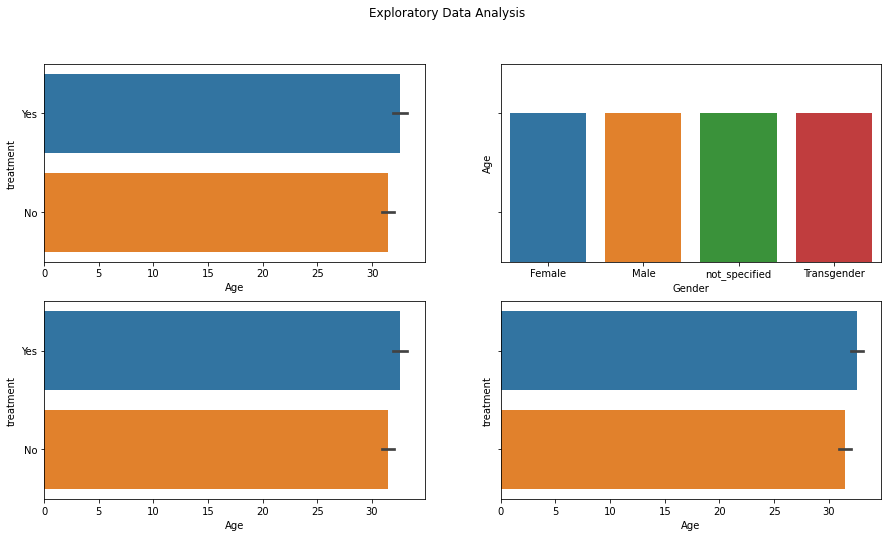

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Exploratory Data Analysis ')

sns.barplot(ax=axes[0, 0],x="Age",y='treatment', data=data)
sns.barplot(ax=axes[0, 1], data=data, x='Gender', y='Age')
sns.barplot(ax=axes[1, 0], data=data, x='Age', y='treatment')
sns.barplot(ax=axes[1, 1], data=data, x='Age', y='treatment')


In [37]:
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Person,,,,,,,,,,,,,,,,,,,,,
1,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
2,44,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
3,32,Male,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
4,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
5,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
